In [119]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [120]:
#dataset
dataset = "penguins"

In [121]:
#main function
def load(data):
    df = sns.load_dataset(data)
    #drop NaNs
    df.dropna(inplace = True)
    return df

In [122]:
#load the dataset and head
penguins = load(dataset)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

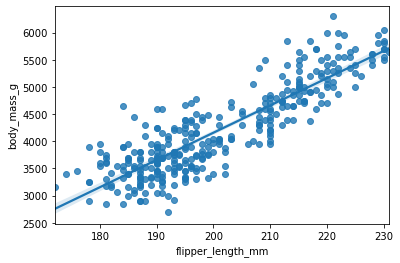

In [123]:
#create regplot
sns.regplot(x = "flipper_length_mm", y = "body_mass_g", data = penguins,
           fit_reg = True)

In [124]:
#create the feature matrix
X_penguins = penguins["flipper_length_mm"]
print("The shape of the feature matrix: ", X_penguins.shape)
#create the target array
y_penguins = penguins["body_mass_g"]
print("The shape of the target array: ", y_penguins.shape)

The shape of the feature matrix:  (333,)
The shape of the target array:  (333,)


In [125]:
#instantiate the model with default parameters
model = LinearRegression()

In [126]:
#shape of X_penguins
print("Original features matrix: ", X_penguins.shape)
print(X_penguins.shape)

Original features matrix:  (333,)
(333,)


In [127]:
#I make the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_penguins, y_penguins,
                                                   test_size = 0.2)

In [128]:
#I fit the model
X_train = X_train[:, np.newaxis]
model.fit(X_train, y_train)

<ipython-input-128-6c22221fb7fc>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]


LinearRegression()

In [129]:
X_test = X_test[:, np.newaxis]
training_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print("Training r2: ", training_r2)
print("Test r2: ", test_r2)

Training r2:  0.739000762696375
Test r2:  0.8187446809179444


<ipython-input-129-dee47b196cc2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [130]:
y_pred = model.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results

,Actual,Predicted
313,5650.0,5338.172068
273,5000.0,5387.329478
253,6050.0,5633.116531
148,3450.0,3912.607161
279,5550.0,5338.172068
...,...,...
305,5600.0,5534.801710
54,2900.0,3519.347877
321,5600.0,5534.801710
317,4875.0,5239.857247
